In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def get_historical_data(tickers):
    data = pd.DataFrame()
    names = list()

    for tick in tickers:
        ticker_data =  yf.download(tick, period="1y")
        data = pd.concat([data, ticker_data["Adj Close"]], axis=1) 
        names.append(tick)

    data.columns = names
    return data

tickers = ["INTC", "AMD", "NVDA", "SMCI", "CQQQ", "INQQ", "EMQQ", "VALE", "FCX", "BABA", "BIDU", "LYFT", "UBER", "JD", "NEM", "BHP", "MT"]
data = get_historical_data(tickers)
print(data.shape)
print(data.tail())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

(252, 17)
                          INTC         AMD        NVDA        SMCI       CQQQ  \
2024-09-23 00:00:00  22.559999  156.750000  116.260002  465.940002  32.590000   
2024-09-24 00:00:00  22.809999  158.320007  120.870003  463.609985  35.740002   
2024-09-25 00:00:00  23.540001  162.020004  123.510002  458.149994  34.830002   
2024-09-26 00:00:00  23.920000  167.490005  124.040001  402.399994  38.200001   
2024-09-27 00:00:00  23.910000  164.350006  121.400002  419.739990  39.709999   

                          INQQ       EMQQ   VALE        FCX        BABA  \
2024-09-23 00:00:00  17.100000  36.180000  10.40  45.139999   90.089996   
2024-09-24 00:00:00  16.850000  37.779999  11.07  48.720001   97.190002   
2024-09-25 00:00:00  16.690001  37.445000  11.16  48.310001   95.459999   
2024-09-26 00:00:00  16.629999  39.080002  11.80  51.910000  105.070000   
2024-09-27 00:00:00  16.549999  39.639999  11.79  51.340000  107.330002   

                           BIDU   LYFT       UBER   

In [3]:
corr_matrix = data.corr()
print(corr_matrix)

          INTC       AMD      NVDA      SMCI      CQQQ      INQQ      EMQQ  \
INTC  1.000000  0.143889 -0.681108 -0.059458  0.051794 -0.657604 -0.675264   
AMD   0.143889  1.000000  0.519596  0.813526 -0.461103  0.464785  0.325222   
NVDA -0.681108  0.519596  1.000000  0.611032 -0.219177  0.868596  0.817985   
SMCI -0.059458  0.813526  0.611032  1.000000 -0.308118  0.381858  0.371837   
CQQQ  0.051794 -0.461103 -0.219177 -0.308118  1.000000 -0.350066  0.178521   
INQQ -0.657604  0.464785  0.868596  0.381858 -0.350066  1.000000  0.802206   
EMQQ -0.675264  0.325222  0.817985  0.371837  0.178521  0.802206  1.000000   
VALE  0.820165 -0.134606 -0.771678 -0.386150  0.335774 -0.638289 -0.492299   
FCX  -0.365699  0.514530  0.721910  0.651429  0.032289  0.622484  0.772617   
BABA -0.645381 -0.305218  0.267053 -0.265501  0.355790  0.314300  0.532367   
BIDU  0.665083 -0.349651 -0.812521 -0.368135  0.470286 -0.786837 -0.539262   
LYFT  0.305130  0.712442  0.195012  0.747463 -0.144960  0.127878

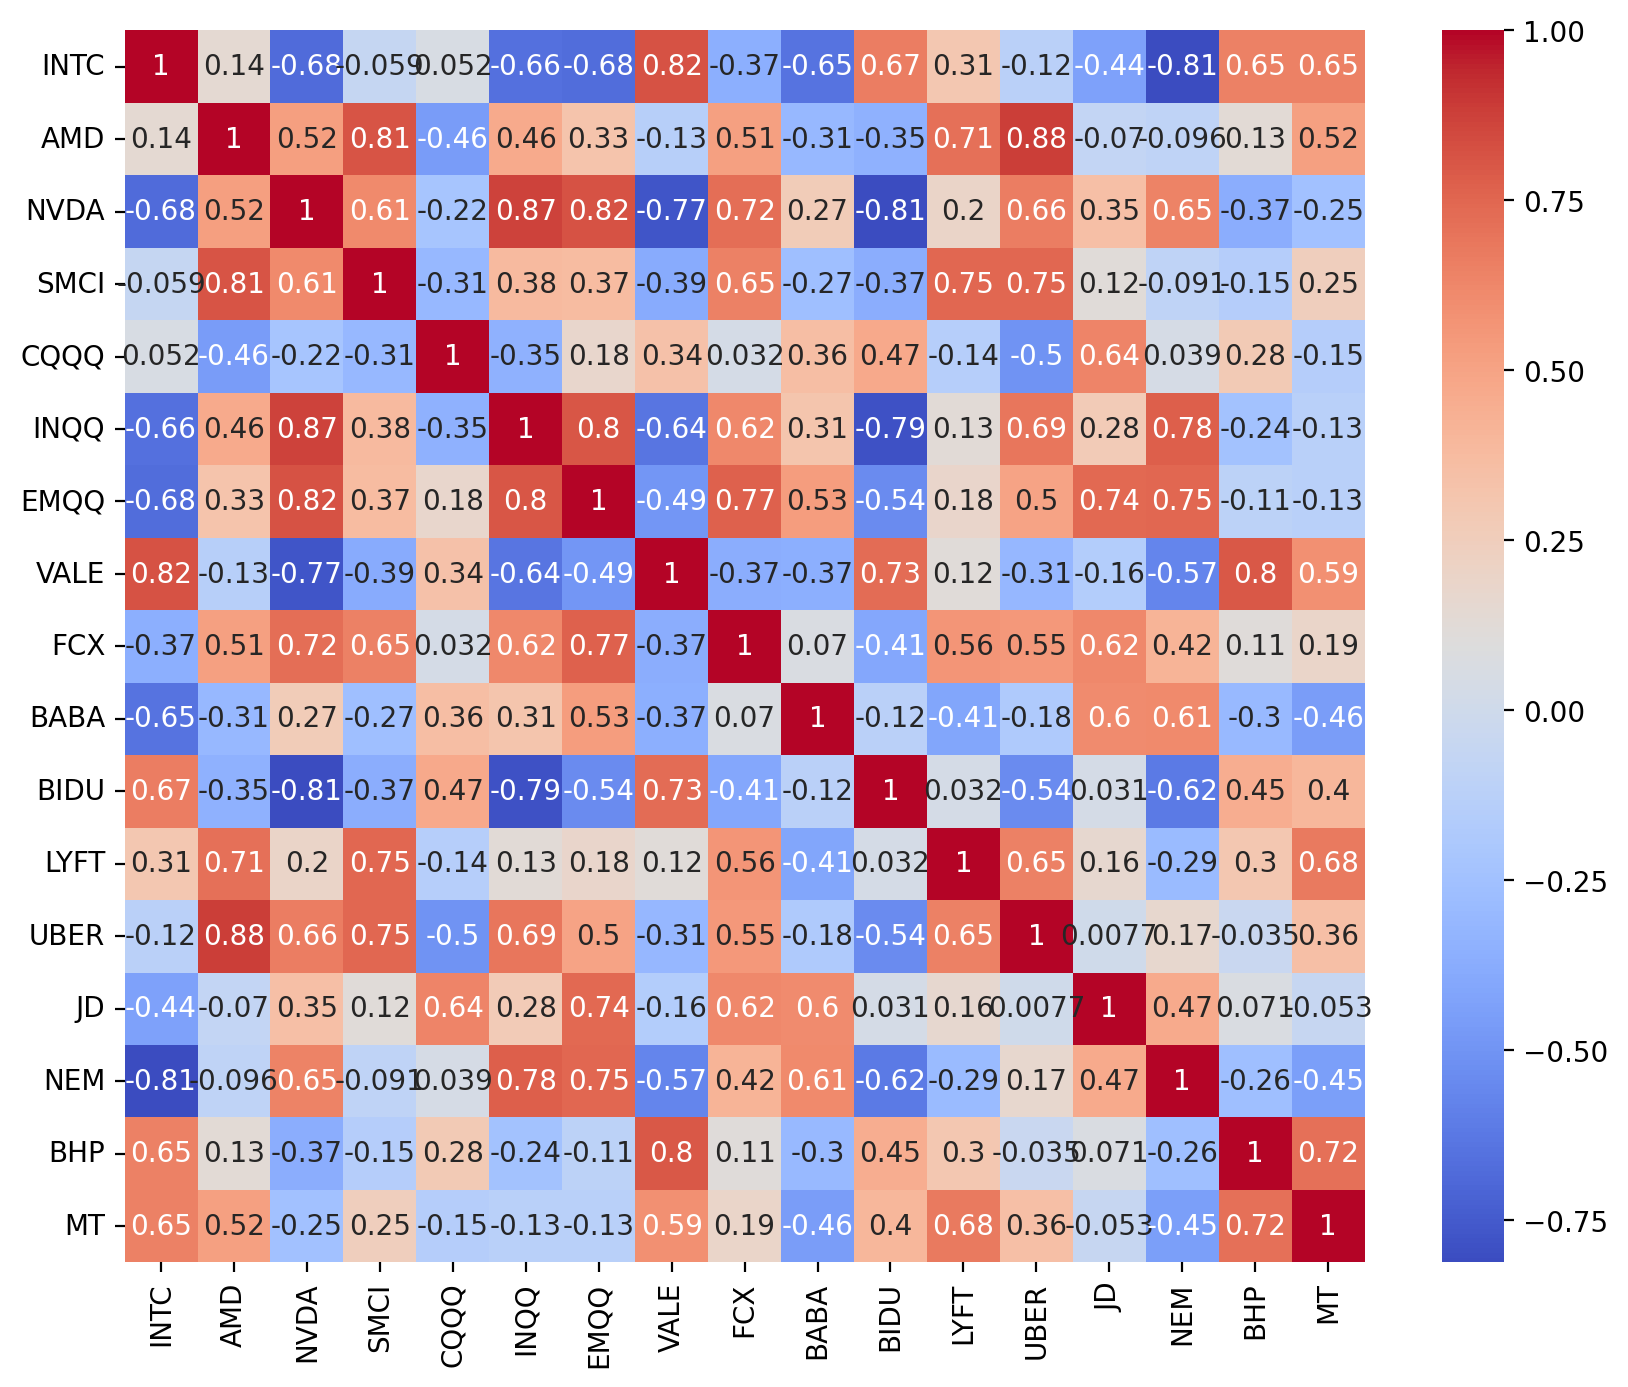

In [4]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8), dpi=200)
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

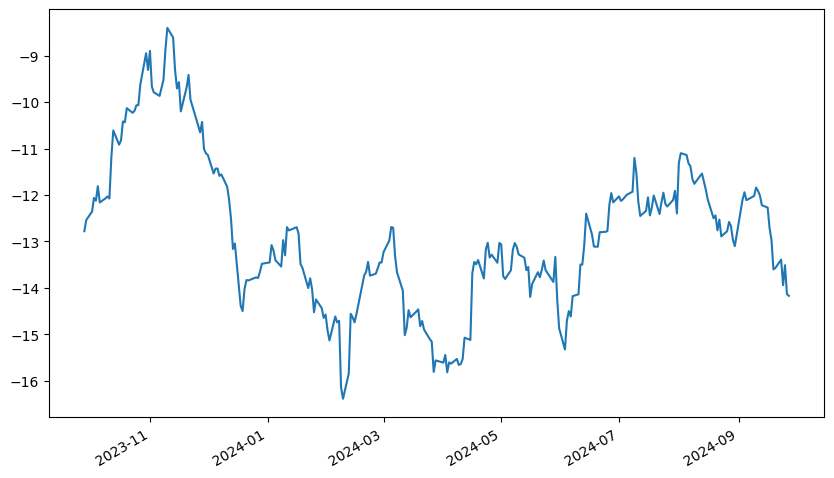

In [5]:
def plot_spreads(data, ticker1, ticker2):
    data_1 = data[ticker1]
    data_2 = data[ticker2]
    spread = data_1 - data_2
    spread.plot(figsize=(10,6))
    plt.show()

plot_spreads(data, "VALE", "MT")

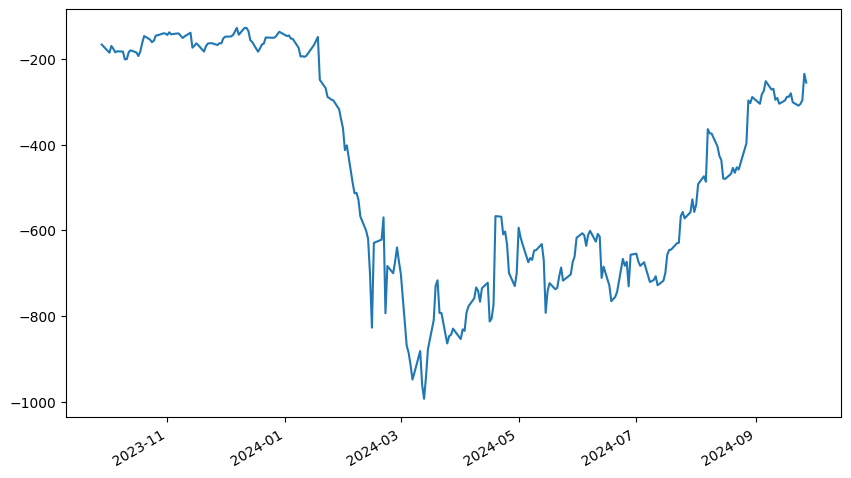

In [6]:
plot_spreads(data, "AMD", "SMCI")

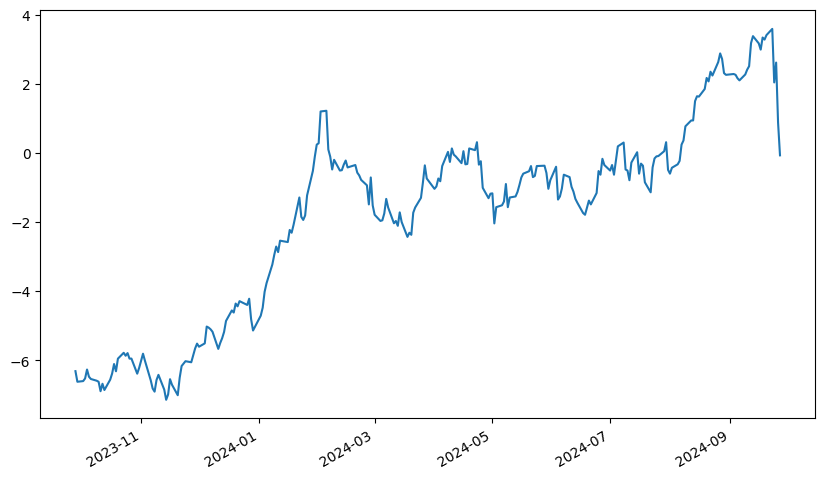

In [7]:
plot_spreads(data, "EMQQ", "CQQQ")

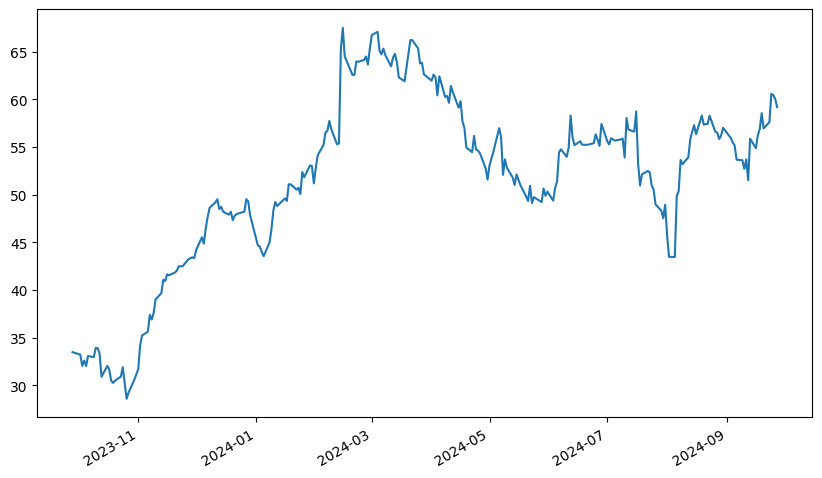

In [8]:
plot_spreads(data, "UBER", "INQQ")

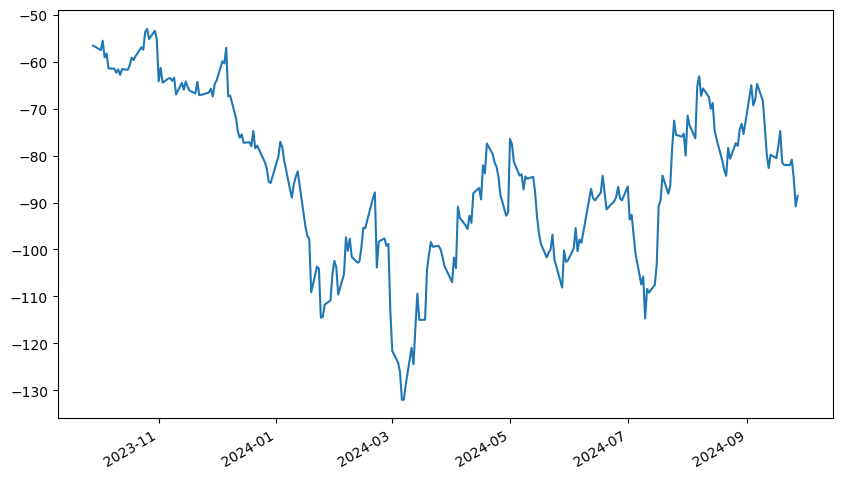

In [9]:
plot_spreads(data, "UBER", "AMD")

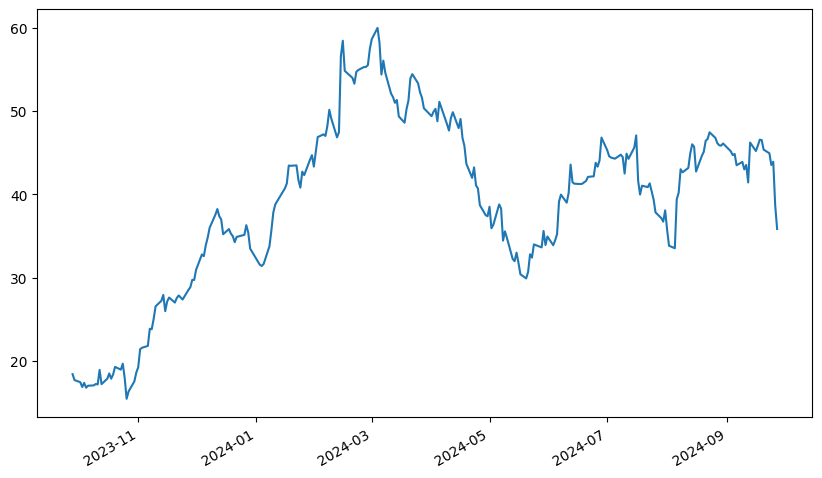

In [10]:
plot_spreads(data, "UBER", "JD")

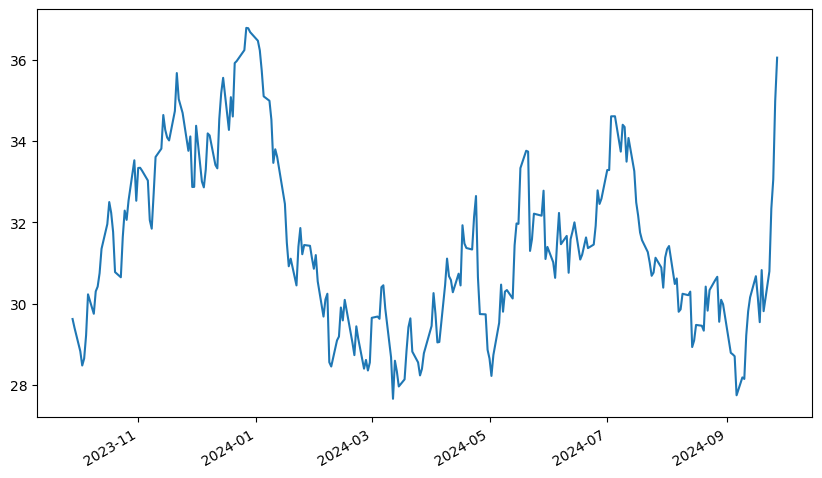

In [11]:
plot_spreads(data, "BHP", "MT")

In [12]:
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import adfuller

def cointegration_test(tuple):
    engle_granger_p_val = (ts.coint(tuple[0], tuple[1]))[1]
    spread_adf_p_val = (adfuller(tuple[0] - tuple[1]))[1]
    ratio_adf_p_val = (adfuller(tuple[0]/tuple[1]))[1]
    print(engle_granger_p_val)
    print(spread_adf_p_val)
    print(ratio_adf_p_val)
    


In [13]:
my_pairs = [("BHP", "MT"), ("UBER", "AMD"), ("VALE", "MT")]
for pair in my_pairs:
    print(pair)
    cointegration_test((data[pair[0]], data[pair[1]]))

('BHP', 'MT')
0.4103828585794345
0.20058239944190287
0.2773021872985332
('UBER', 'AMD')
0.14107082465494403
0.1667329350942805
0.025554473731600327
('VALE', 'MT')
0.811636292122845
0.40086693496823533
0.5653343740217102


Text(0.5, 1.0, 'Price Ratio between VALE and MT')

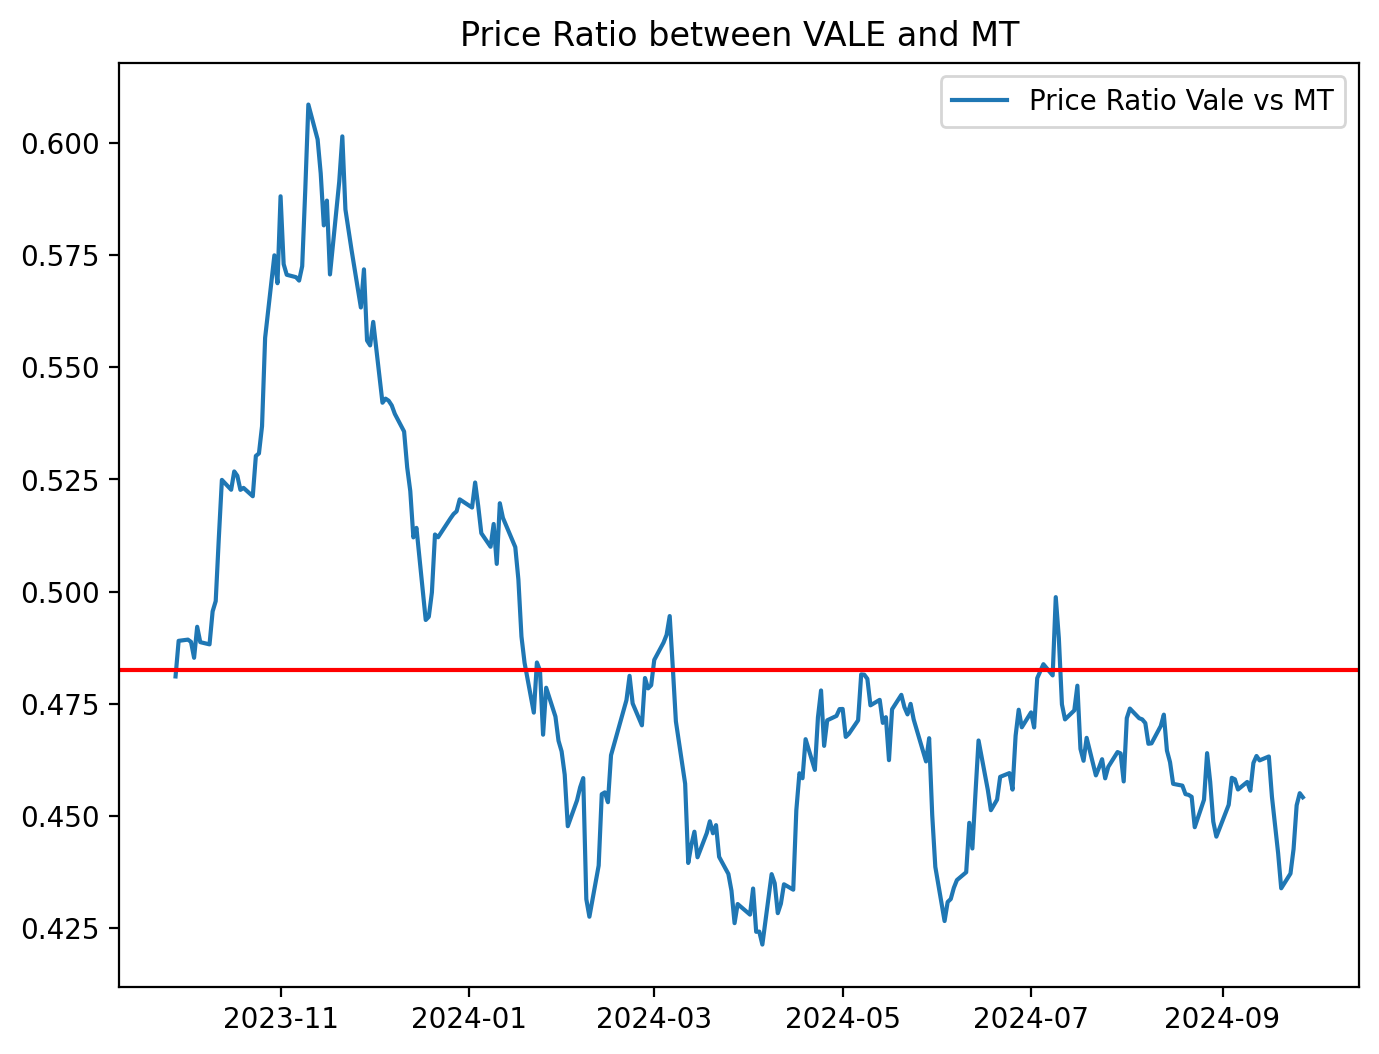

In [14]:
plt.figure(figsize=(8,6), dpi=200)
ratio = data["VALE"]/data["MT"]
plt.plot(ratio, label="Price Ratio Vale vs MT")
plt.axhline(ratio.mean(), color="red")
plt.legend()
plt.title("Price Ratio between VALE and MT")

Text(0.5, 1.0, 'Price Spread between VALE and MT')

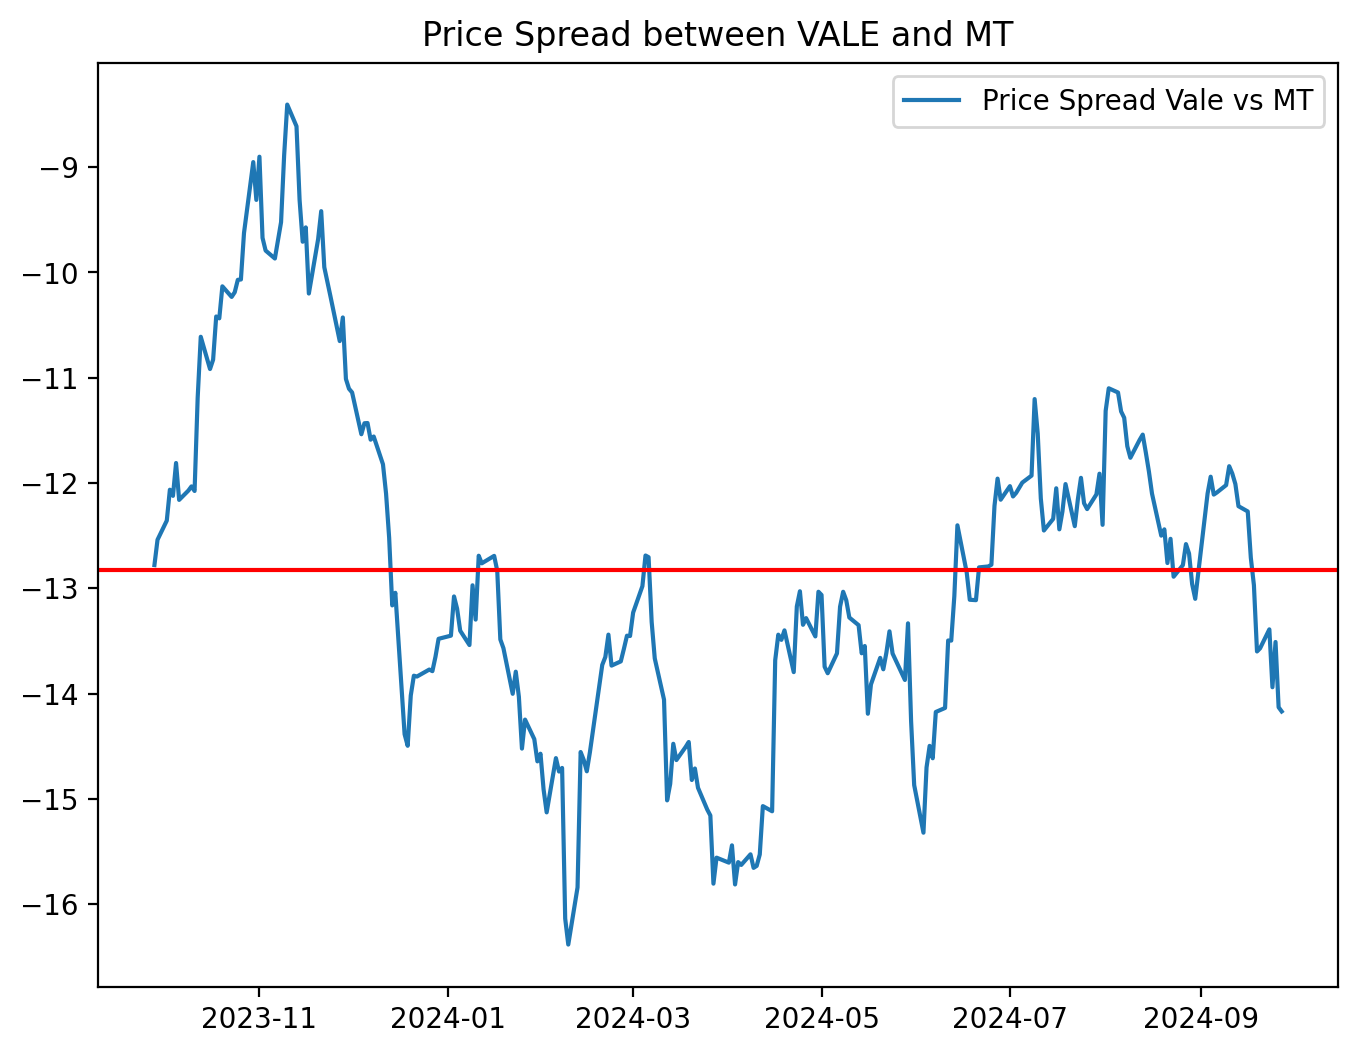

In [15]:
plt.figure(figsize=(8,6), dpi=200)
spread = data["VALE"] - data["MT"]
plt.plot(spread, label="Price Spread Vale vs MT")
plt.axhline(spread.mean(), color="red")
plt.legend()
plt.title("Price Spread between VALE and MT")

Text(0.5, 1.0, 'Z-score ratio between VALE and MT')

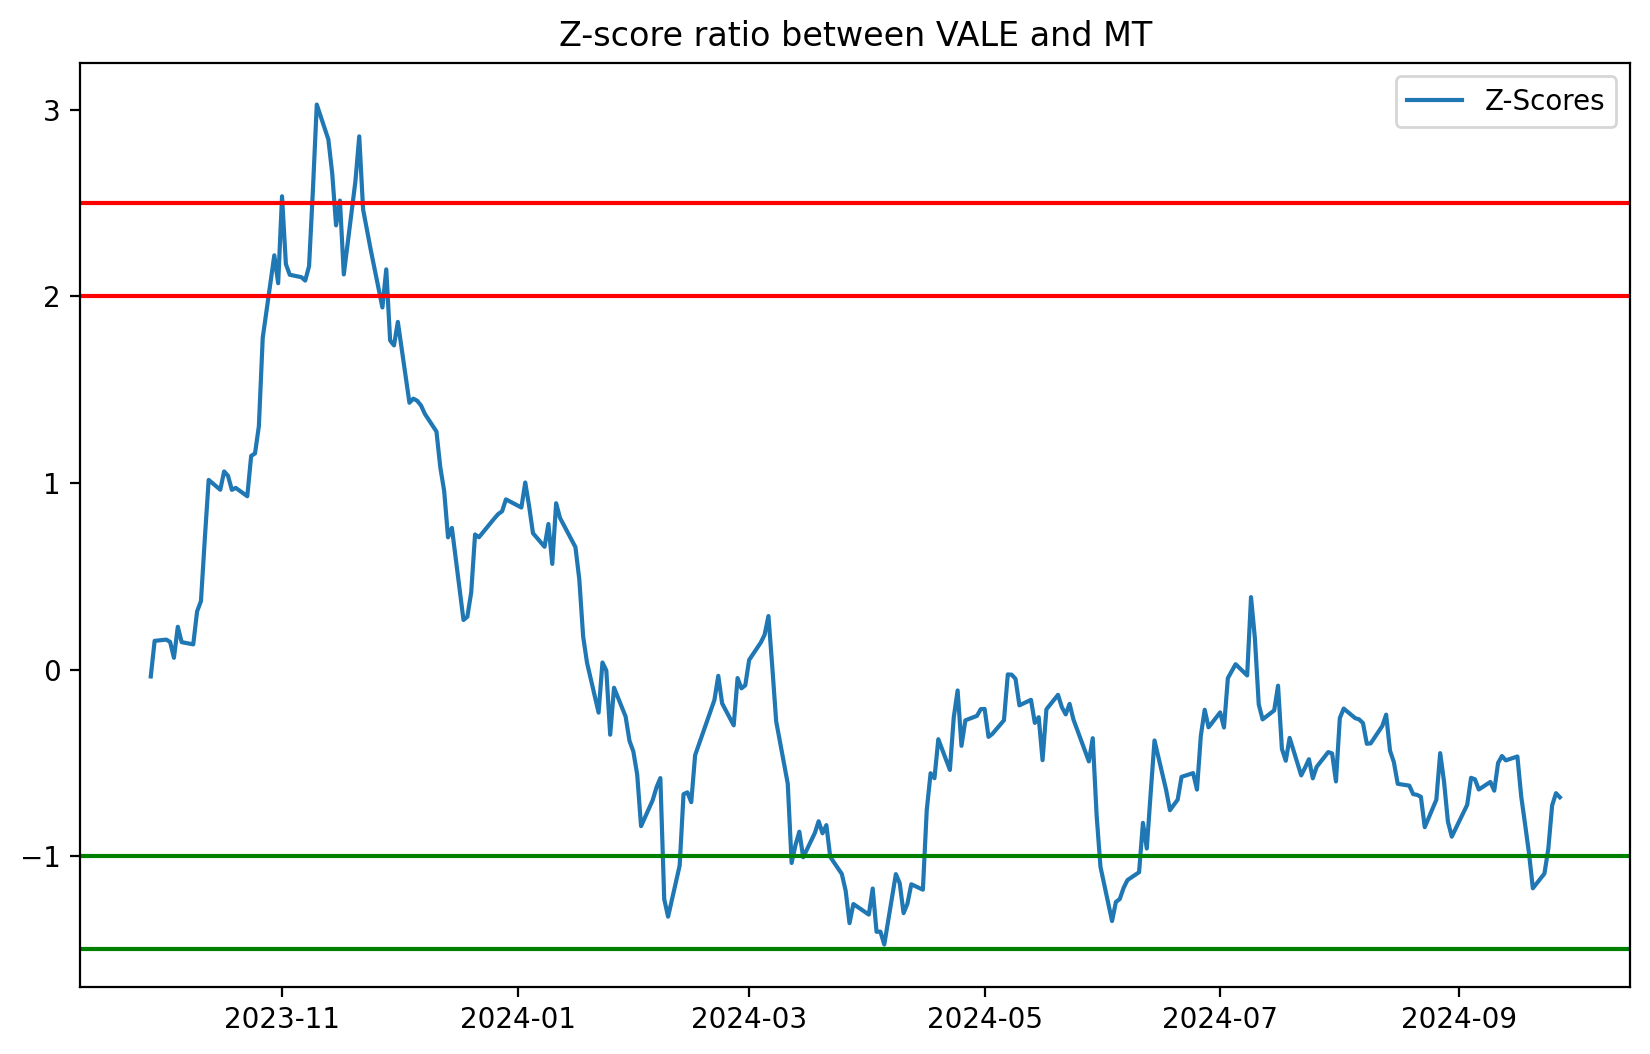

In [16]:
plt.figure(figsize=(10, 6), dpi=200)
z_score_ratio = (ratio - ratio.mean())/ratio.std()
plt.plot(z_score_ratio, label="Z-Scores")
plt.axhline(2.0, color="red")
plt.axhline(2.5, color="red")
plt.axhline(-1.0, color="green")
plt.axhline(-1.5, color="green")
plt.legend(loc="best")
plt.title("Z-score ratio between VALE and MT")

Text(0.5, 1.0, 'Z-score spread between VALE and MT')

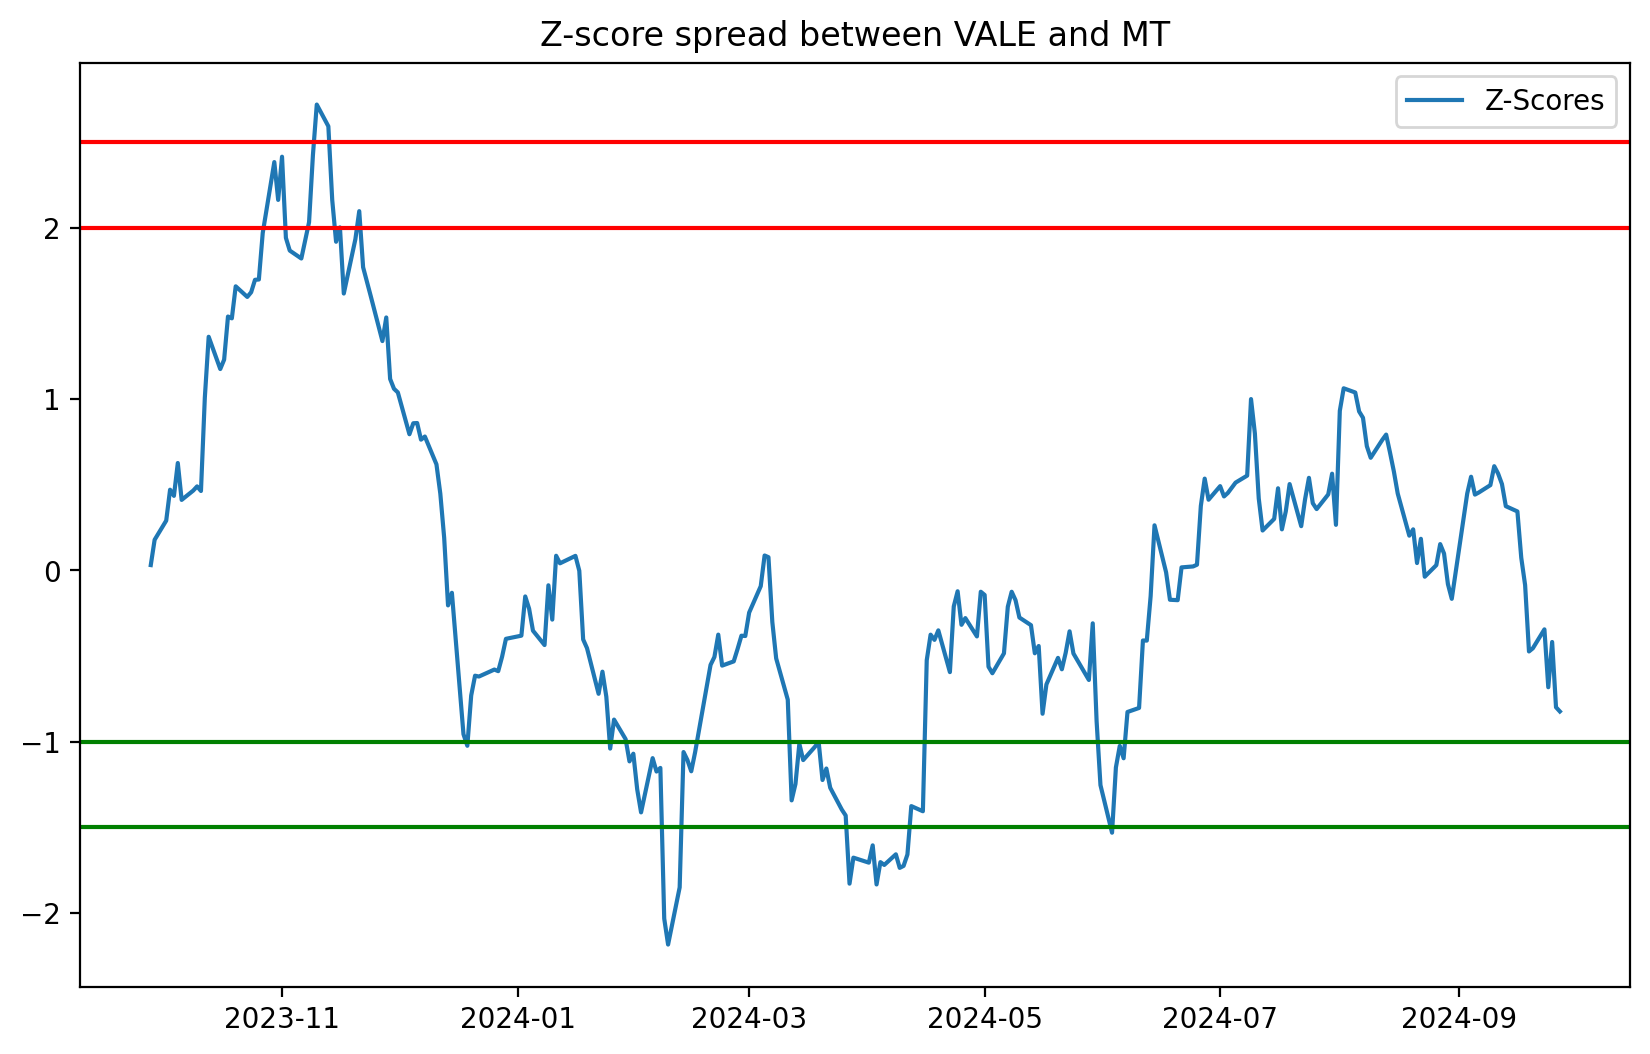

In [17]:
plt.figure(figsize=(10, 6), dpi=200)
z_score_spread = (spread - spread.mean())/spread.std()
plt.plot(z_score_spread, label="Z-Scores")
plt.axhline(2.0, color="red")
plt.axhline(2.5, color="red")
plt.axhline(-1.0, color="green")
plt.axhline(-1.5, color="green")
plt.legend(loc="best")
plt.title("Z-score spread between VALE and MT")

In [18]:
debug_df = pd.DataFrame({
    'Vale Price': data["VALE"],
    'MT Price': data["MT"],
    'Ratio': ratio,
    'Z-Score': z_score_ratio
})
print(debug_df)

                     Vale Price   MT Price     Ratio   Z-Score
2023-09-28 00:00:00   11.848245  24.627710  0.481094 -0.037147
2023-09-29 00:00:00   12.000490  24.539474  0.489028  0.153645
2023-10-02 00:00:00   11.839291  24.196333  0.489301  0.160211
2023-10-03 00:00:00   11.534800  23.598288  0.488798  0.148118
2023-10-04 00:00:00   11.427333  23.549269  0.485252  0.062845
2023-10-05 00:00:00   11.445244  23.255146  0.492160  0.228953
2023-10-06 00:00:00   11.624355  23.784565  0.488735  0.146605
2023-10-09 00:00:00   11.516889  23.588482  0.488242  0.134745
2023-10-10 00:00:00   11.821379  23.853193  0.495589  0.311420
2023-10-11 00:00:00   11.973624  24.049274  0.497879  0.366485
2023-10-12 00:00:00   11.731824  22.921808  0.511819  0.701720
2023-10-13 00:00:00   11.722868  22.333570  0.524899  1.016254
2023-10-16 00:00:00   11.955713  22.872789  0.522705  0.963486
2023-10-17 00:00:00   12.054224  22.882595  0.526786  1.061625
2023-10-18 00:00:00   11.552711  21.970819  0.525821  1

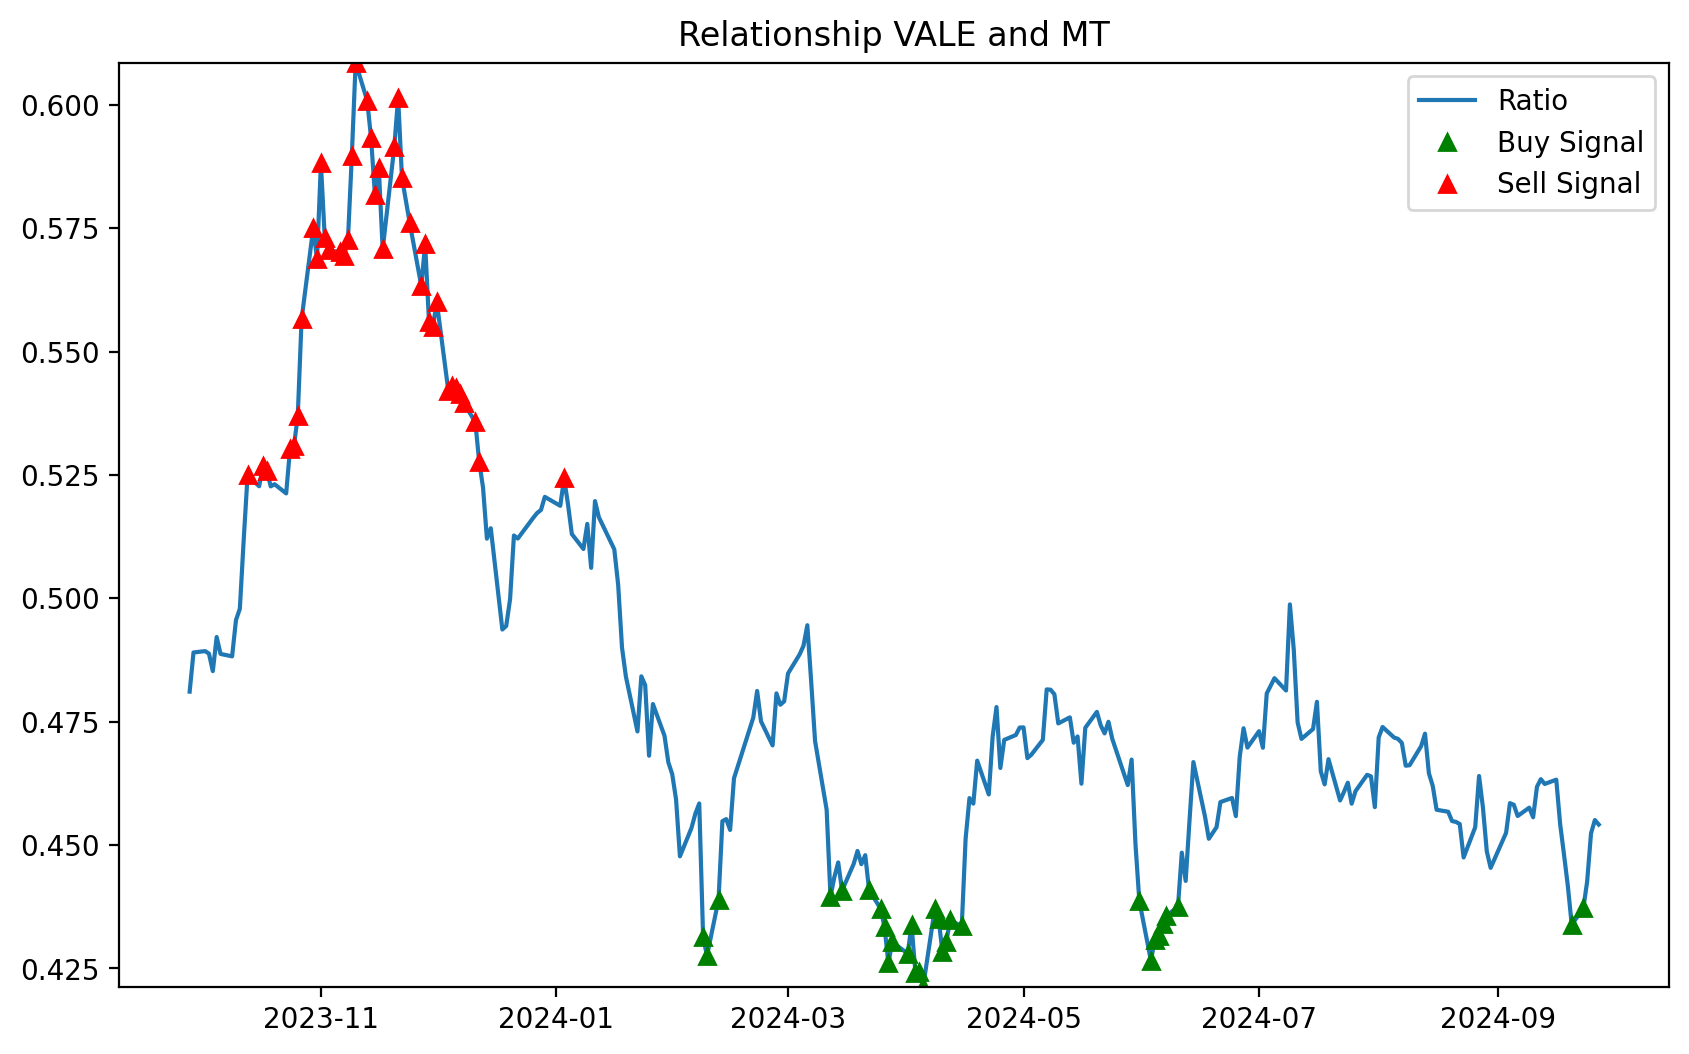

In [19]:
# PREFERRED STRATEGY -> USE THE NORMAL Z_SCORE RATIOS, NOT THE MOVING AVERAGE FOR MORE ACCURATE RESULTS

plt.figure(figsize=(10, 6), dpi=200)
plt.plot(ratio)
buy=ratio.copy()
sell=ratio.copy()

buy[z_score_ratio > -1] = 0
sell[z_score_ratio < 1] = 0

plt.plot(buy, color="green", linestyle="None", marker="^")
plt.plot(sell, color="red", linestyle="None", marker="^")

x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(["Ratio", "Buy Signal", "Sell Signal"])
plt.title("Relationship VALE and MT")
plt.show()

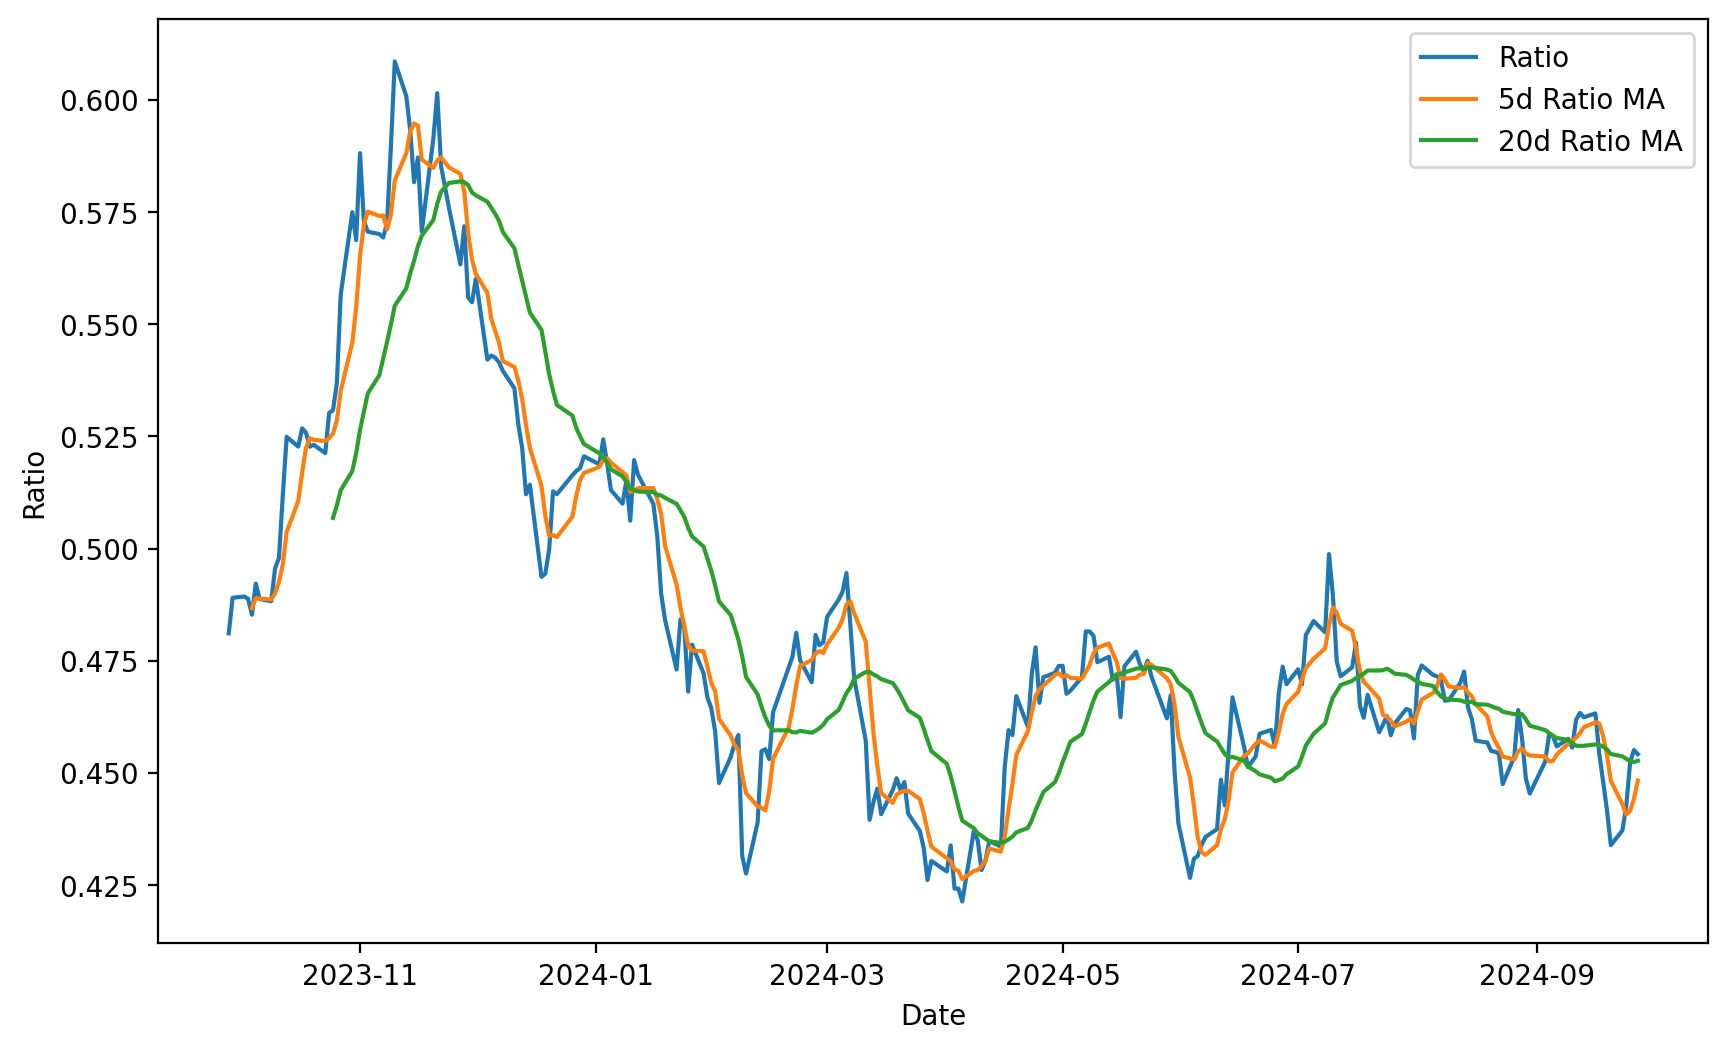

In [20]:
plt.figure(figsize=(10, 6), dpi=200)
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()

plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(["Ratio", "5d Ratio MA", "20d Ratio MA"])
plt.xlabel("Date")
plt.ylabel("Ratio")
plt.show()

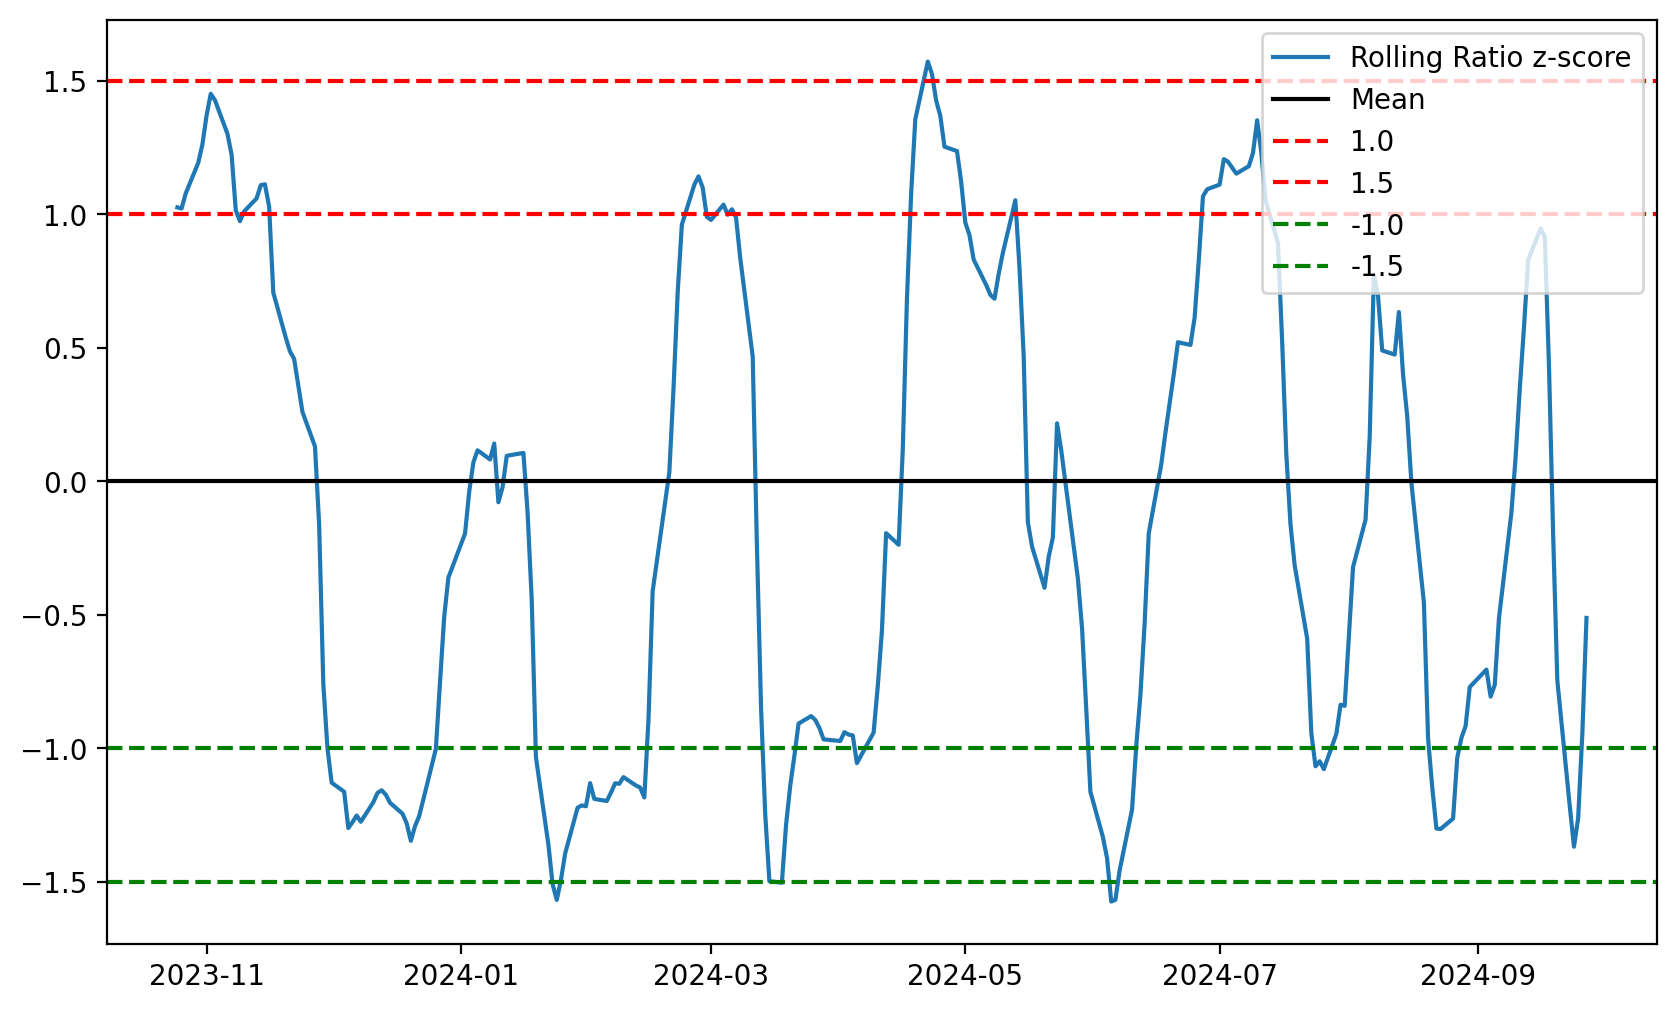

In [21]:
zscore_ratio_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(zscore_ratio_20_5.index, zscore_ratio_20_5.values)
plt.axhline(0.0, color="black")
plt.axhline(1.0, color="red", linestyle='--')
plt.axhline(1.5, color="red", linestyle='--')
plt.axhline(-1.0, color="green", linestyle='--')
plt.axhline(-1.5, color="green", linestyle='--')
plt.legend(["Rolling Ratio z-score", "Mean", "1.0", "1.5", "-1.0", "-1.5"])
plt.show()


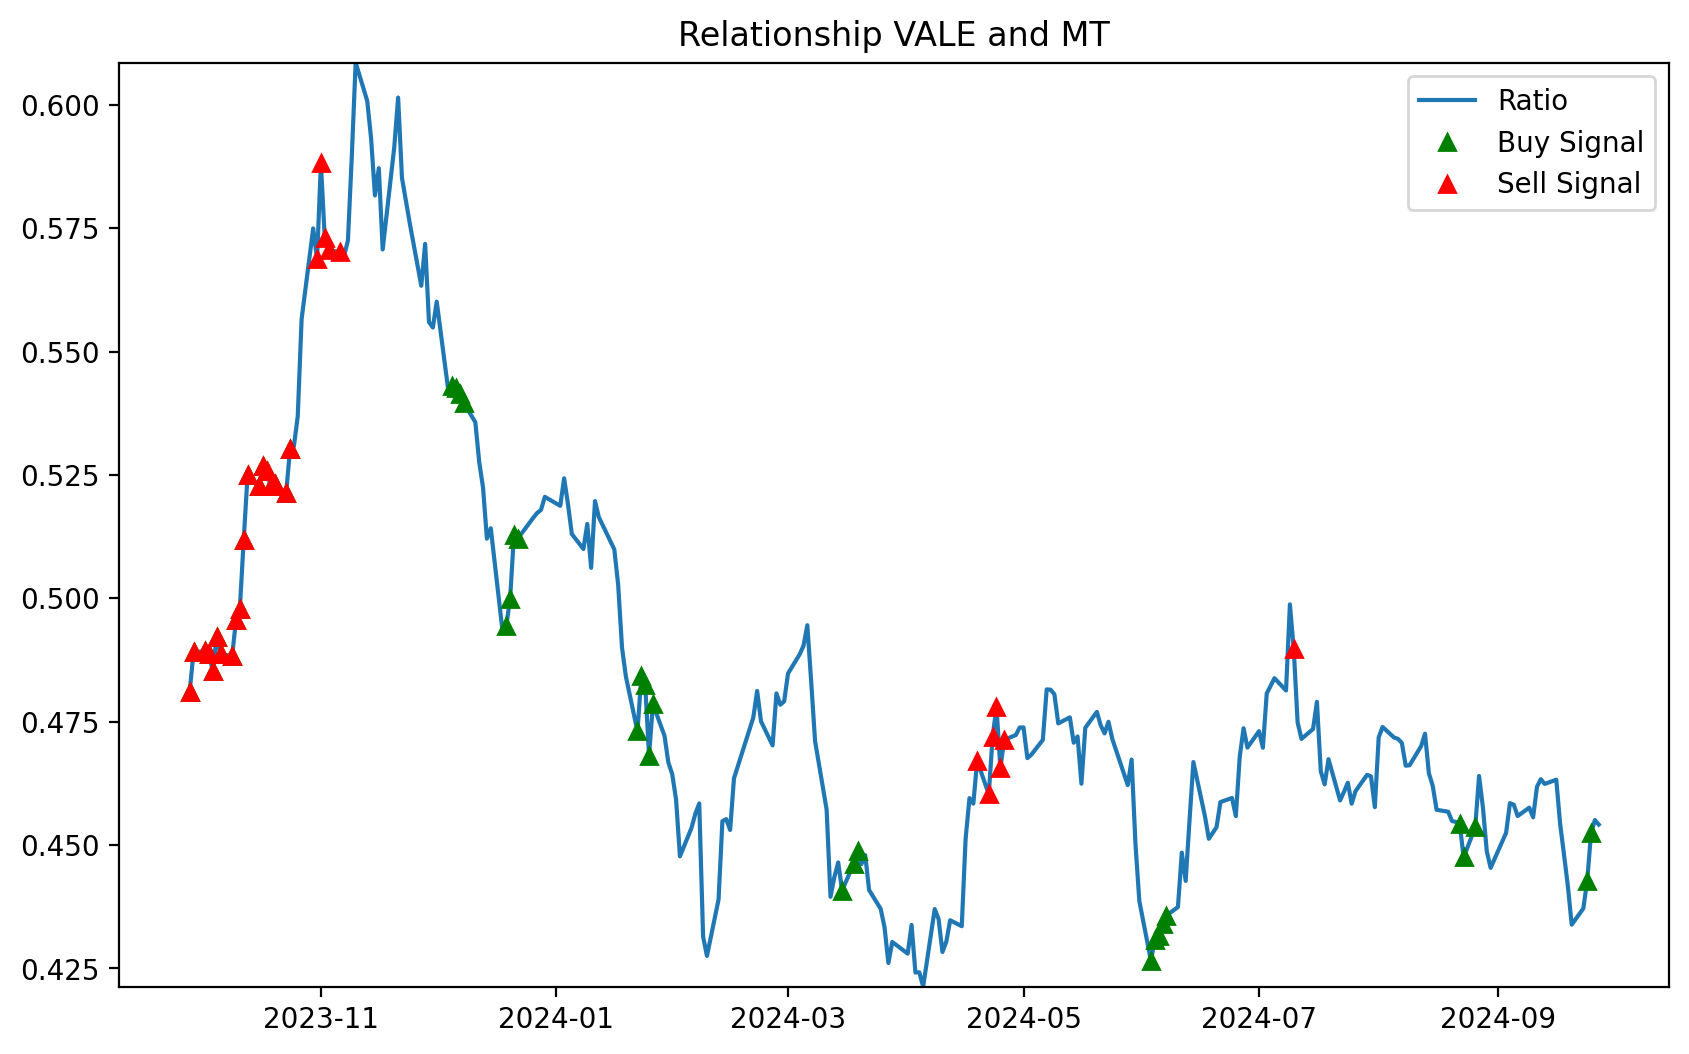

In [22]:
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(ratio)
buy=ratio.copy()
sell=ratio.copy()

buy[zscore_ratio_20_5 > -1.25] = 0
sell[zscore_ratio_20_5 < 1.25] = 0

plt.plot(buy, color="green", linestyle="None", marker="^")
plt.plot(sell, color="red", linestyle="None", marker="^")

x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(["Ratio", "Buy Signal", "Sell Signal"])
plt.title("Relationship VALE and MT")
plt.show()